In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data**

In [2]:
# Linked Birth Infant Death Records 2017-2018
birth_deaths = pd.read_fwf("./data/birth.txt")

# Physicians and Surgeons by race/ethnicity and practice
physicians = pd.read_csv("./data/physicians.csv")

# Raw Birth Data -> https://data.nber.org/linkpe/2013/LinkPE13Guide.pdf
birth_deaths_raw = pd.read_csv("./data/US_Birth_Data_Short.csv")

births_deaths_large = pd.read_csv("./data/US_Birth_Data_2013.csv")

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (326,329,332,335,338,366,367,368,369,370) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
print("birth_deaths:", len(birth_deaths), "physicians:", len(physicians), "raw:", len(birth_deaths_raw))

birth_deaths: 77 physicians: 892 raw: 1000


In [4]:
physicians.head(10)

,Month,Year,Primary Practice County,Race/Ethnicity,Count of Licensees
0,March,2016,Alameda,African-American/Black/African,148
1,March,2016,Alameda,American Indian/ Native America,6
2,March,2016,Alameda,Asian - Cambodian,1
3,March,2016,Alameda,Asian - Chinese,284
4,March,2016,Alameda,Asian - Indian,273
5,March,2016,Alameda,Asian - Indonesian,2
6,March,2016,Alameda,Asian - Japanese,20
7,March,2016,Alameda,Asian - Korean,41
8,March,2016,Alameda,Asian - Other Asian,34
9,March,2016,Alameda,Asian - Pakistani,15


<AxesSubplot:xlabel='Race/Ethnicity', ylabel='Count of Licensees'>

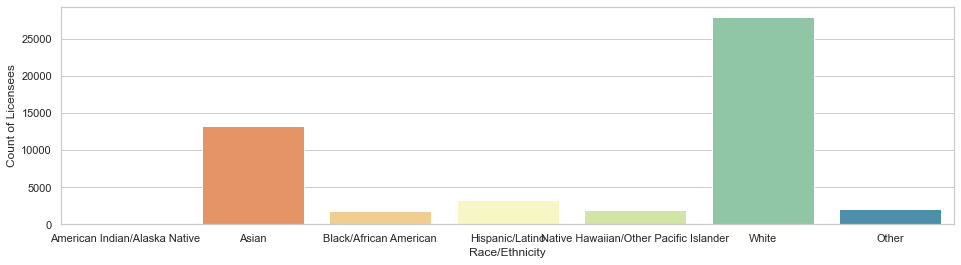

In [5]:
# Simplify Race/Ethnicity into ethnic groups (https://grants.nih.gov/grants/guide/notice-files/not-od-15-089.html)
ethnic_groups = {
    "American Indian/Alaska Native": 0,
    "Asian": 0,
    "Black/African American": 0,
    "Hispanic/Latino": 0,
    "Native Hawaiian/Other Pacific Islander": 0,
    "White": 0,
    "Other": 0
}

for index, row in physicians.iterrows():
    if 'White' in row['Race/Ethnicity']:
        ethnic_groups['White'] += row['Count of Licensees']
    elif 'Latino' in row['Race/Ethnicity'] or 'Hispanic' in row['Race/Ethnicity']:
        ethnic_groups['Hispanic/Latino'] += row['Count of Licensees']
    elif 'African-American' in row['Race/Ethnicity'] or 'Black' in row['Race/Ethnicity']:
        ethnic_groups['Black/African American'] += row['Count of Licensees']
    elif 'Hawaiian' in row['Race/Ethnicity']:
        ethnic_groups['Native Hawaiian/Other Pacific Islander'] += row['Count of Licensees']
    elif 'Asian' in row['Race/Ethnicity'] or 'Taiwanese' in row['Race/Ethnicity'] or 'Singaporean' in row['Race/Ethnicity'] or 'Malaysian' in row['Race/Ethnicity']:
        ethnic_groups['Asian'] += row['Count of Licensees']
    elif 'Native America' in row['Race/Ethnicity']:
        ethnic_groups['American Indian/Alaska Native'] += row['Count of Licensees']
    else:
        ethnic_groups['Other'] += row['Count of Licensees']
    
columns = ['Race/Ethnicity', 'Count of Licensees']

data = []
for race, count in ethnic_groups.items():
    data.append([race, count])

physicians_ethnic_groups = pd.DataFrame(data, columns=columns)

# Plot!
sns.set(style="whitegrid")

plt.figure(1, figsize=(16,4))
sns.barplot(x='Race/Ethnicity',y='Count of Licensees', data=physicians_ethnic_groups, palette='Spectral')

In [6]:
# Obviously a lot of data so let's cleanup
birth_deaths_raw.columns

Index(['revision', 'laterec', 'DOB_YEAR', 'DOB_MONTH', 'DOB_TIME',
       'DOB_DAY_OF_WEEK', 'OCCURENCE_TERRITORY', 'OCCURENCE_FIPS_COUNTY',
       'OCCURENCE_COUNTY_POPULATION', 'BIRTH_PLACE_REVISED',
       ...
       'stoccfipd', 'cntoccfipd', 'stresfipd', 'drcnty', 'cntyrfpd',
       'cntrsppd', 'hospd', 'weekdayd', 'dthyr', 'dthmon'],
      dtype='object', length=389)

  revision  laterec  DOB_YEAR  DOB_MONTH  DOB_TIME  DOB_DAY_OF_WEEK  \
0        S        0      2012          5       NaN                3   
1        S        0      2012          5       NaN                5   
2        S        0      2012          6       NaN                2   
3        S        0      2012          9       NaN                7   
4        S        0      2012          9       NaN                3   

   OCCURENCE_TERRITORY  OCCURENCE_FIPS_COUNTY  OCCURENCE_COUNTY_POPULATION  \
0                  NaN                    NaN                          NaN   
1                  NaN                    NaN                          NaN   
2                  NaN                    NaN                          NaN   
3                  NaN                    NaN                          NaN   
4                  NaN                    NaN                          NaN   

   BIRTH_PLACE_REVISED  ...  stoccfipd  cntoccfipd  stresfipd  drcnty  \
0                  NaN  ...    

Text(0.5, 1.0, 'Race of Mother')

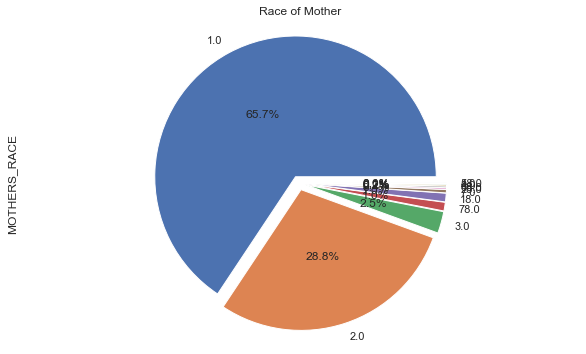

In [11]:
race_df = births_deaths_large[births_deaths_large["MOTHERS_RACE"].notnull()]

print(race_df.head(5))

pie, ax = plt.subplots(figsize=[10,6])
race_df["MOTHERS_RACE"].value_counts().plot(kind='pie', explode=[0.05]*11, autopct="%.1f%%", pctdistance=0.5)
plt.axis('equal')
plt.title('Race of Mother')

      revision  laterec  DOB_YEAR  DOB_MONTH  DOB_TIME  DOB_DAY_OF_WEEK  \
0            S        0      2012          5       NaN                3   
1            S        0      2012          5       NaN                5   
2            S        0      2012          6       NaN                2   
3            S        0      2012          9       NaN                7   
4            S        0      2012          9       NaN                3   
...        ...      ...       ...        ...       ...              ...   
22748        S        0      2013         12       NaN                1   
22749        S        0      2013         12       NaN                1   
22750        S        0      2013         11       NaN                5   
22751        S        0      2013         12       NaN                5   
22752        S        0      2013         12       NaN                5   

       OCCURENCE_TERRITORY  OCCURENCE_FIPS_COUNTY  \
0                      NaN                    

ValueError: The following variables cannot be assigned with wide-form data: `hue`, `size`

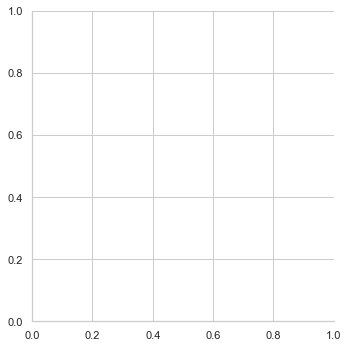

In [15]:
# cleaned_df = race_df[race_df[['MOTHERS_EDUCATION', 'FATHERS_EDUCATION', 'MOTHERS_AGE_RECODE_41'] != ''].all(1)]

setup_df = race_df[race_df["MOTHERS_EDUCATION"] != '']
# setup_df_2 = setup_df[setup_df["FATHERS_EDUCATION"].notnull()]
# setup_df_3 = setup_df_2[setup_df_2["MOTHERS_AGE_RECODE_41"].notnull()]

# print(cleaned_df["MOTHERS_EDUCATION"])

print(setup_df)

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=race_df,
    x="MOTHERS_EDUCATION", y="FATHERS_EDUCATION",
    hue="MOTHERS_RACE", size="MOTHERS_AGE_RECODE_41",
    palette=cmap,
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)